In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [14]:
# Load the image of the dog, using pic 1700 from the test set used before
image_path = '/Users/pantheon/Documents/Deep Learning/cats_and_dogs_small/test/dogs/dog.1700.jpg'
dog_img = load_img(image_path,target_size=(150, 150))
dog_img_array = img_to_array(dog_img)


In [15]:
# Reshape the image to add an extra dimension
dog_img_array = dog_img_array.reshape((1,) + dog_img_array.shape)

# ImageDataGenerator configurations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


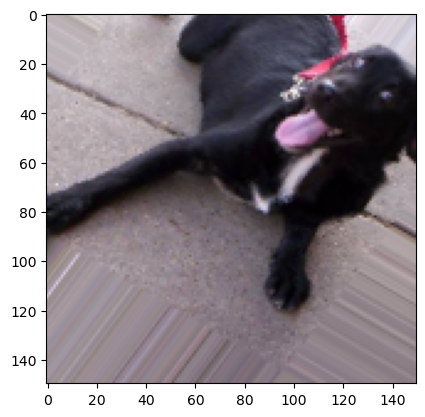

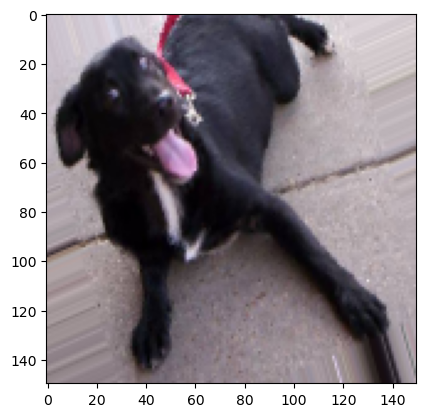

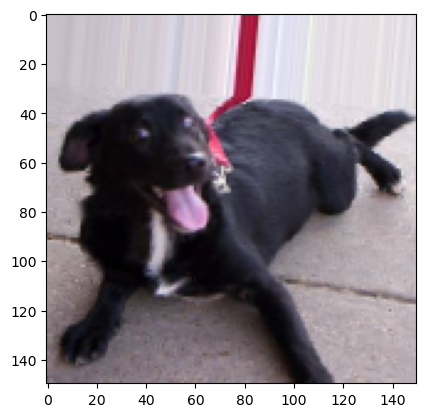

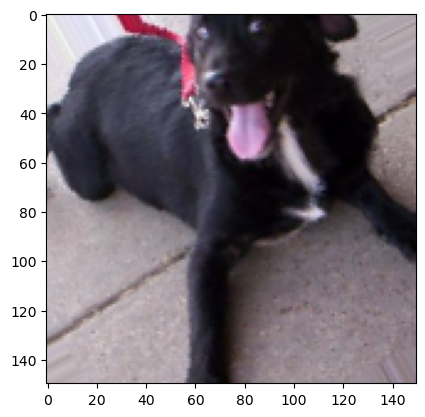

In [18]:
# Define the transformations
transformations = {
    'rotation_range': ImageDataGenerator(rotation_range=40),
    'width_shift_range': ImageDataGenerator(width_shift_range=0.2),
    'shear_range': ImageDataGenerator(shear_range=0.2),
    'zoom_range': ImageDataGenerator(zoom_range=0.2),
    'horizontal_flip': ImageDataGenerator(horizontal_flip=True)
}

# Plotting using method in 5.2 example
i = 0
for batch in datagen.flow(dog_img_array, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


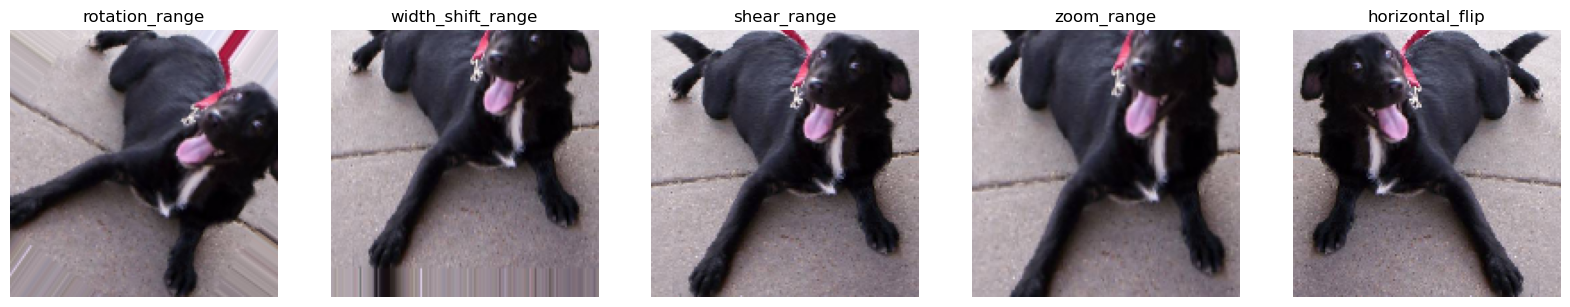

In [20]:
# Create a figure to display the images
fig, axs = plt.subplots(1, 5, figsize=(20, 20))

# Apply the transformations and plot the images with labelling
for ax, (key, generator) in zip(axs, transformations.items()):
    augmented_image = generator.flow(dog_img_array, batch_size=1).next()[0].astype(np.uint8)
    ax.imshow(array_to_img(augmented_image))
    ax.set_title(key)
    ax.axis('off')

plt.show()